# Plotting functions for Heisenberg XY model

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import re

In [2]:
def load_data(filepath):
    """Loads data from a pickle file."""
    with open(filepath, "rb") as f:
        data = pickle.load(f)
    return data

In [3]:
def plot_phase_diagrams(data, filename_prefix="", output_dir="plots"):
    """Plots phase diagrams for ground-state energy, spectral gap, and mid-chain entropy."""
    L = data["system_size"]
    gammas = data["gamma_vals"]
    Js = data["J_vals"]
    E0 = data["E0"]
    gap = data["gap"]
    SvN = data["SvN"]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Phase Diagrams for L={L}", fontsize=16)

    titles = [r'Ground-state energy density $e_0$',
              r'Spectral gap $\Delta$',
              r'Mid-chain entropy $S_{\mathrm{vN}}$']
    plot_data = [E0 / L, gap, SvN]

    for ax, dat, title in zip(axes, plot_data, titles):
        im = ax.imshow(dat,
                       origin='lower',
                       extent=[gammas[0], gammas[-1],
                               Js[0], Js[-1]],
                       aspect='auto',
                       cmap='viridis')
        ax.set_title(title, fontsize=13)
        ax.set_xlabel(r'$\gamma$')
        ax.set_ylabel(r'$J$')
        fig.colorbar(im, ax=ax, fraction=0.046)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    # Ensure output_dir exists
    os.makedirs(output_dir, exist_ok=True)
    plot_filename = os.path.join(output_dir, f"{filename_prefix}_L{L}_phase_diagrams.png")
    plt.savefig(plot_filename)
    print(f"Saved phase diagram: {plot_filename}")
    plt.show() # Show plot in notebook

In [ ]:
def plot_entropy_vs_L(entropy_data_dict, target_J, target_gamma, output_dir=".", filename_prefix=""):
    """Plots mid-chain entropy vs. system size (L) for fixed J and gamma.
    entropy_data_dict: dict where keys are L and values are entropy for that L.
    """
    if not entropy_data_dict:
        print("No entropy data provided for L-dependency plot.")
        return

    # Sort by L before plotting
    sorted_L_values = sorted(entropy_data_dict.keys())
    entropies_for_plot = [entropy_data_dict[l_val] for l_val in sorted_L_values]
    
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_L_values, entropies_for_plot, marker='o')
    plt.title(fr'Mid-chain Entropy vs. System Size (L)\n(Target J={target_J:.2f}, $\gamma$={target_gamma:.2f})', fontsize=14)
    plt.xlabel('System Size (L)')
    plt.ylabel(r'Mid-chain Entropy $S_{\mathrm{vN}}$')
    plt.grid(True)
    # Ensure output_dir exists
    os.makedirs(output_dir, exist_ok=True)
    plot_filename = os.path.join(output_dir, f"{filename_prefix}entropy_vs_L_J{target_J:.2f}_gamma{target_gamma:.2f}.png")
    plt.savefig(plot_filename)
    print(f"Saved entropy vs L plot: {plot_filename}")
    plt.show() 

In [ ]:
def plot_entropy_J_vs_L(entropy_data_dict, target_gamma, output_dir=".", filename_prefix=""):
    """Plots mid-chain entropy vs. J for fixed gamma.


Found 10 .pkl files in data
Processing data\XY_phase_diag_L10_chi32.pkl...
Saved phase diagram: plots\XY_phase_diag_L10_chi32_L10_phase_diagrams.png


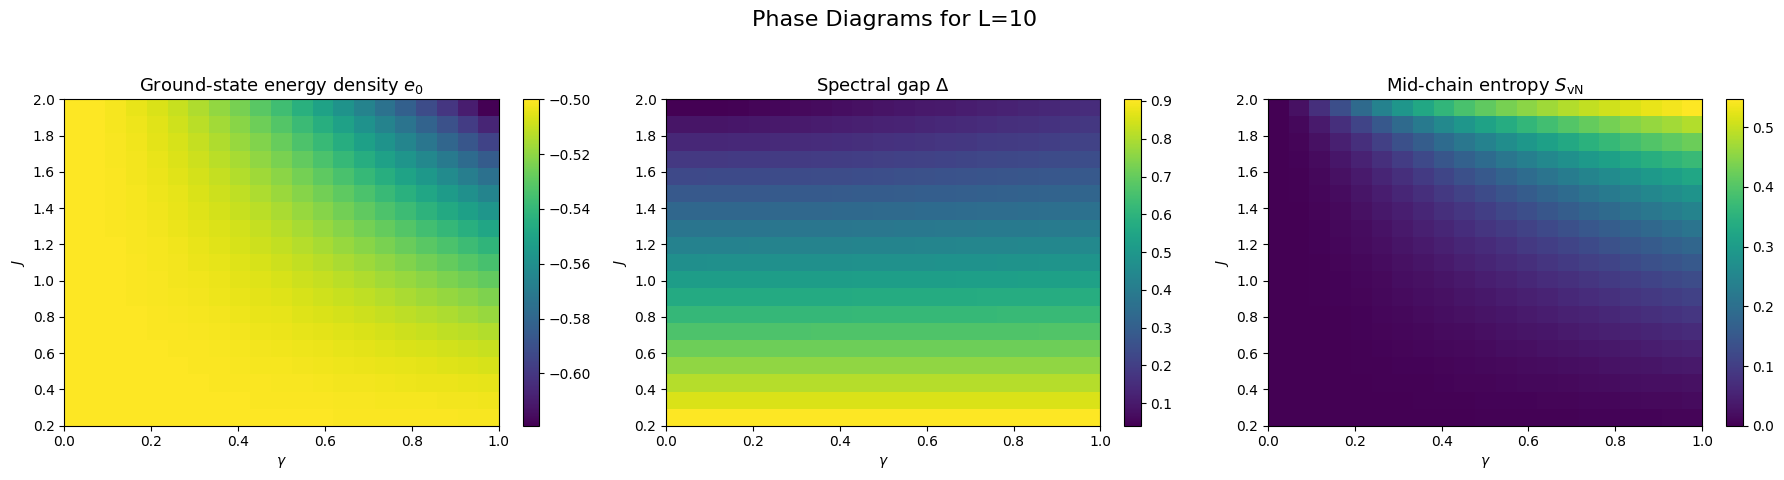

Extracted SvN=0.5468 for L=10 (Closest J=2.00, Gamma=1.00)
Processing data\XY_phase_diag_L15_chi32.pkl...
Saved phase diagram: plots\XY_phase_diag_L15_chi32_L15_phase_diagrams.png


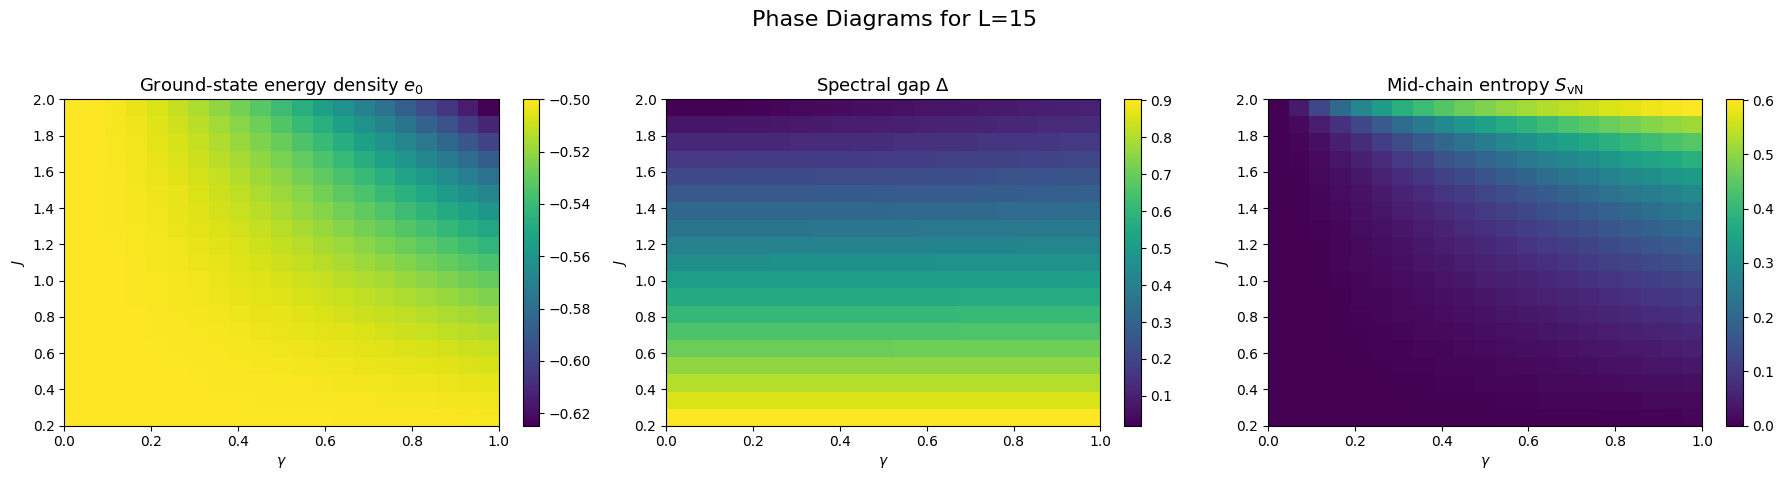

Extracted SvN=0.6015 for L=15 (Closest J=2.00, Gamma=1.00)
Processing data\XY_phase_diag_L20_chi32.pkl...
Saved phase diagram: plots\XY_phase_diag_L20_chi32_L20_phase_diagrams.png


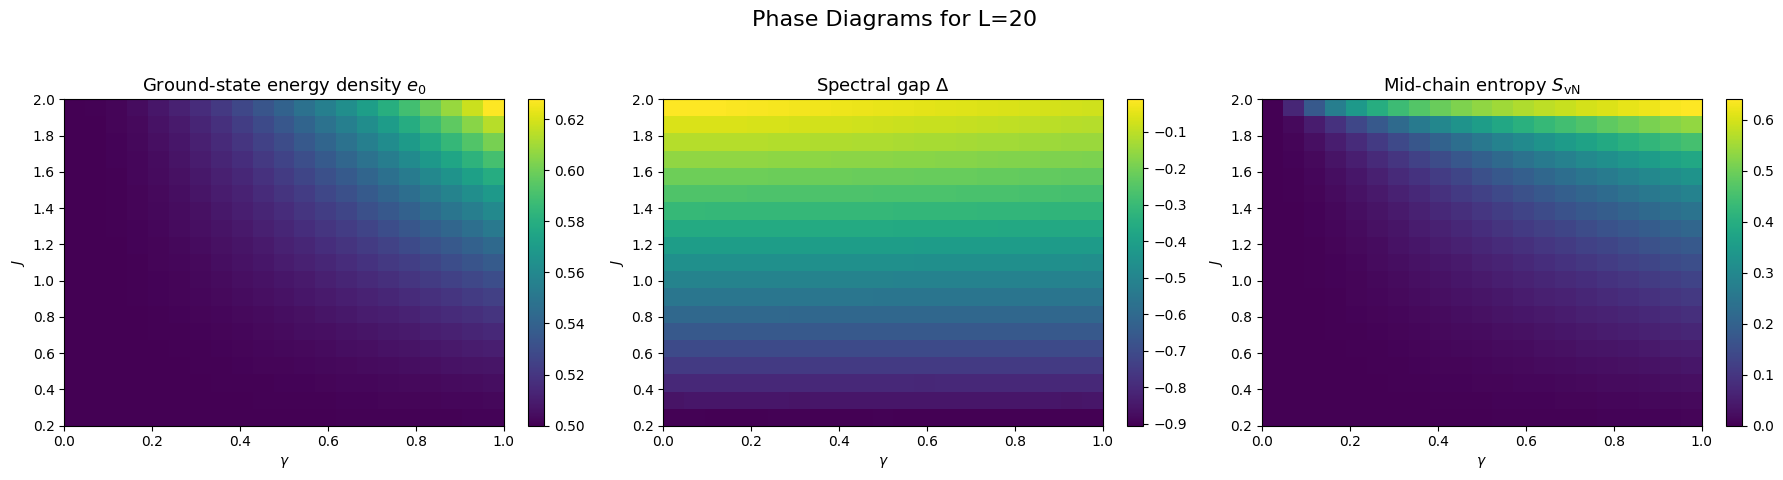

Extracted SvN=0.6402 for L=20 (Closest J=2.00, Gamma=1.00)
Processing data\XY_phase_diag_L20_chi32_broad.pkl...
Saved phase diagram: plots\XY_phase_diag_L20_chi32_broad_L20_phase_diagrams.png


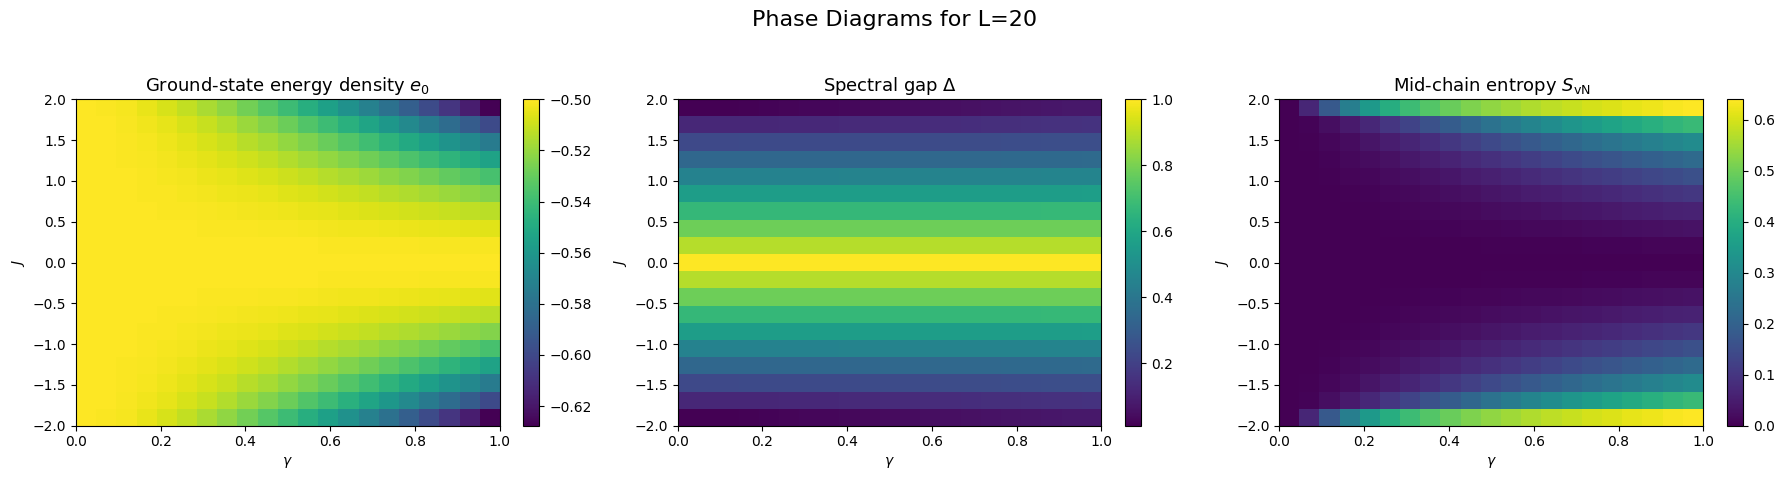

Processing data\XY_phase_diag_L25_chi32.pkl...
Saved phase diagram: plots\XY_phase_diag_L25_chi32_L25_phase_diagrams.png


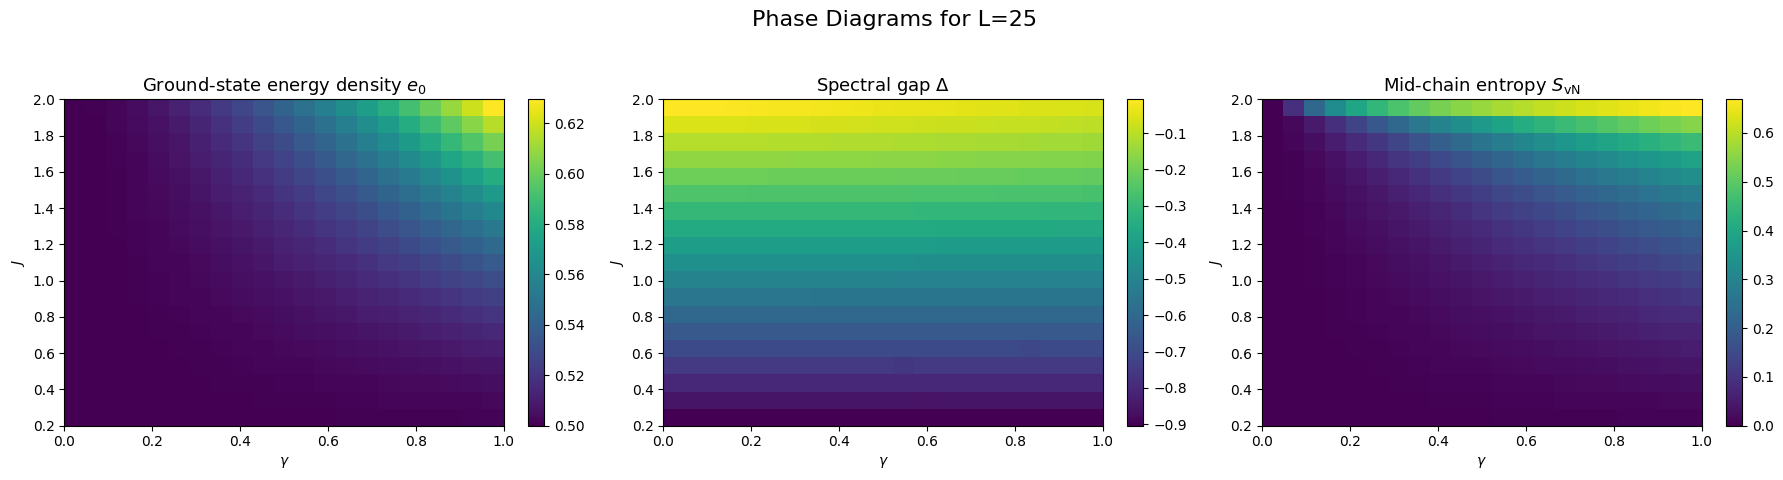

Extracted SvN=0.6689 for L=25 (Closest J=2.00, Gamma=1.00)
Processing data\XY_phase_diag_L30_chi32.pkl...
Saved phase diagram: plots\XY_phase_diag_L30_chi32_L30_phase_diagrams.png


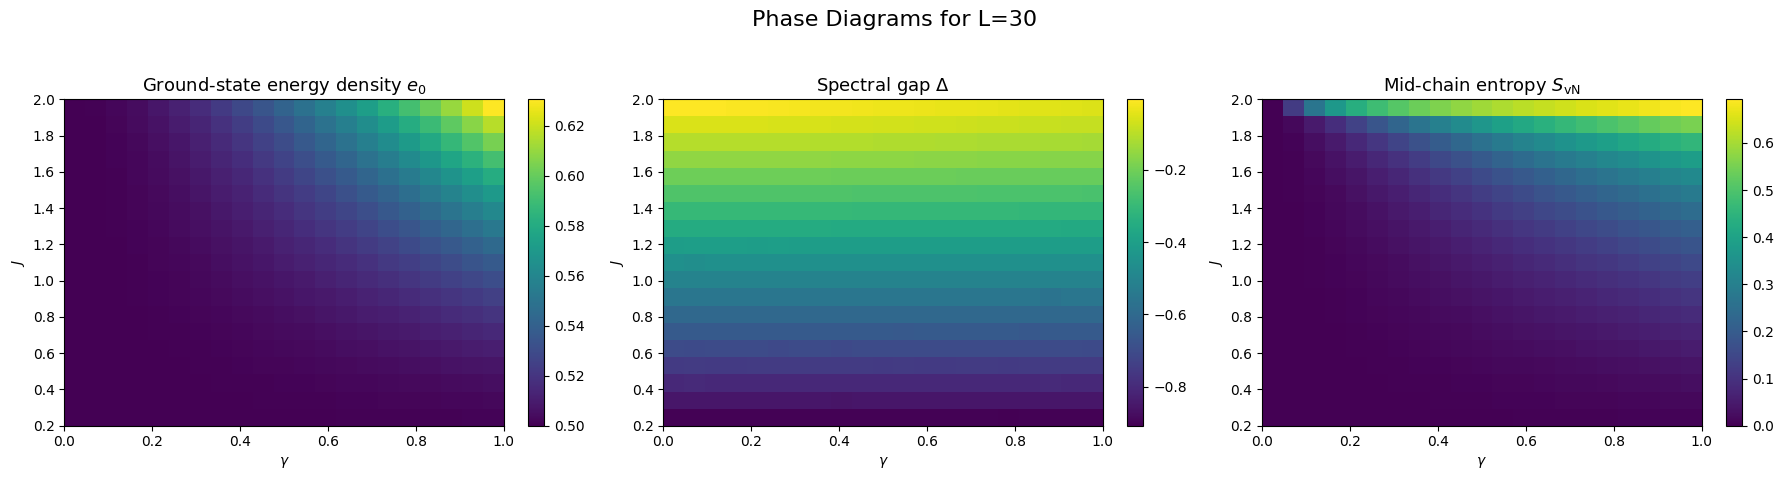

Extracted SvN=0.6925 for L=30 (Closest J=2.00, Gamma=1.00)
Processing data\XY_phase_diag_L35_chi32.pkl...
Saved phase diagram: plots\XY_phase_diag_L35_chi32_L35_phase_diagrams.png


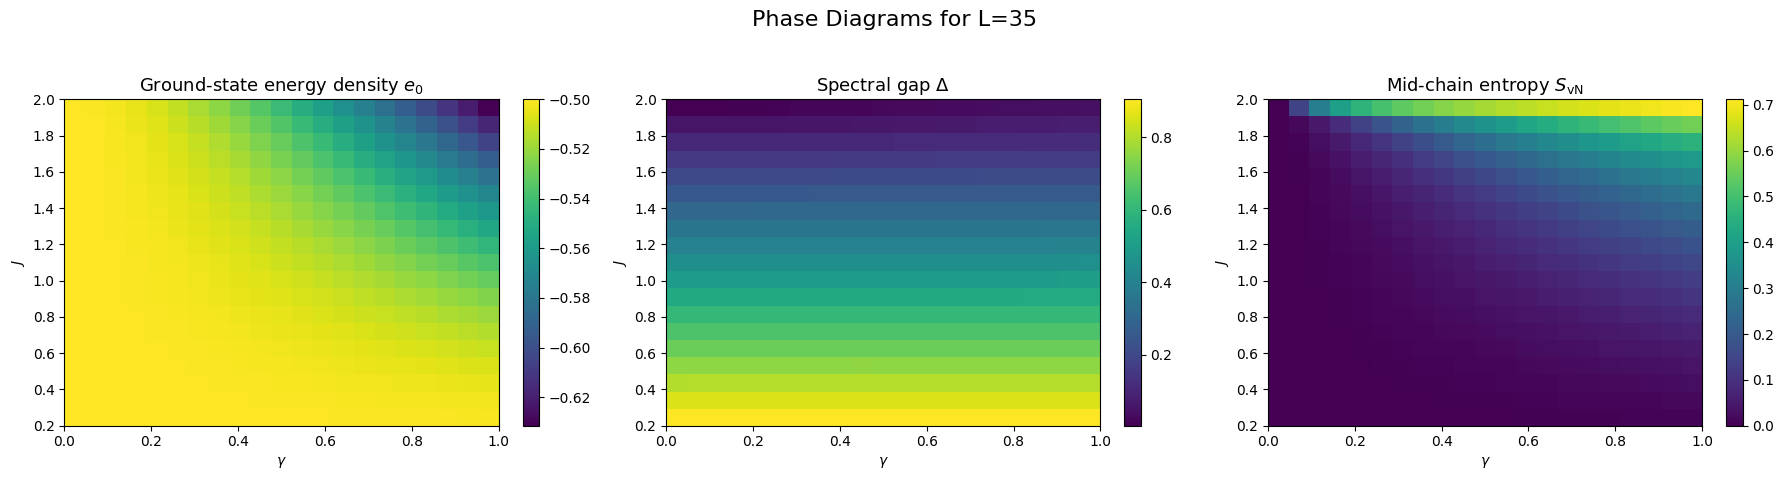

Extracted SvN=0.7119 for L=35 (Closest J=2.00, Gamma=1.00)
Processing data\XY_phase_diag_L40_chi32.pkl...
Saved phase diagram: plots\XY_phase_diag_L40_chi32_L40_phase_diagrams.png


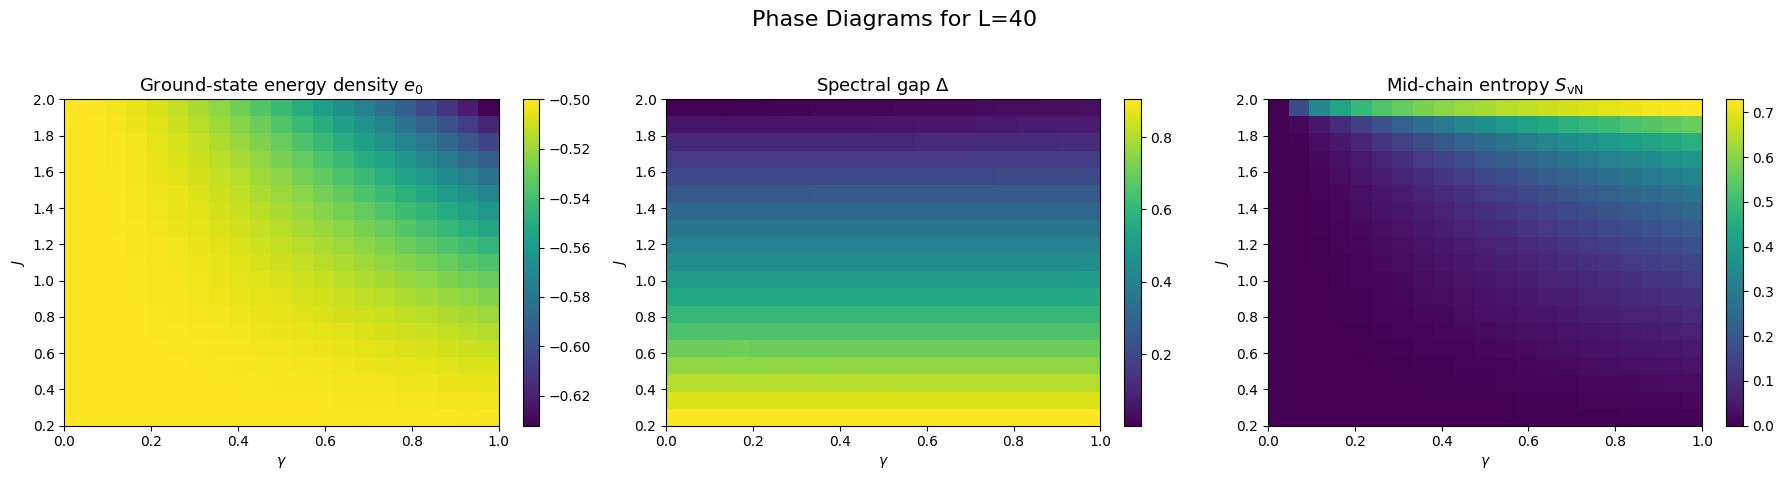

Extracted SvN=0.7288 for L=40 (Closest J=2.00, Gamma=1.00)
Processing data\XY_phase_diag_L40_chi32_broad.pkl...
Saved phase diagram: plots\XY_phase_diag_L40_chi32_broad_L40_phase_diagrams.png


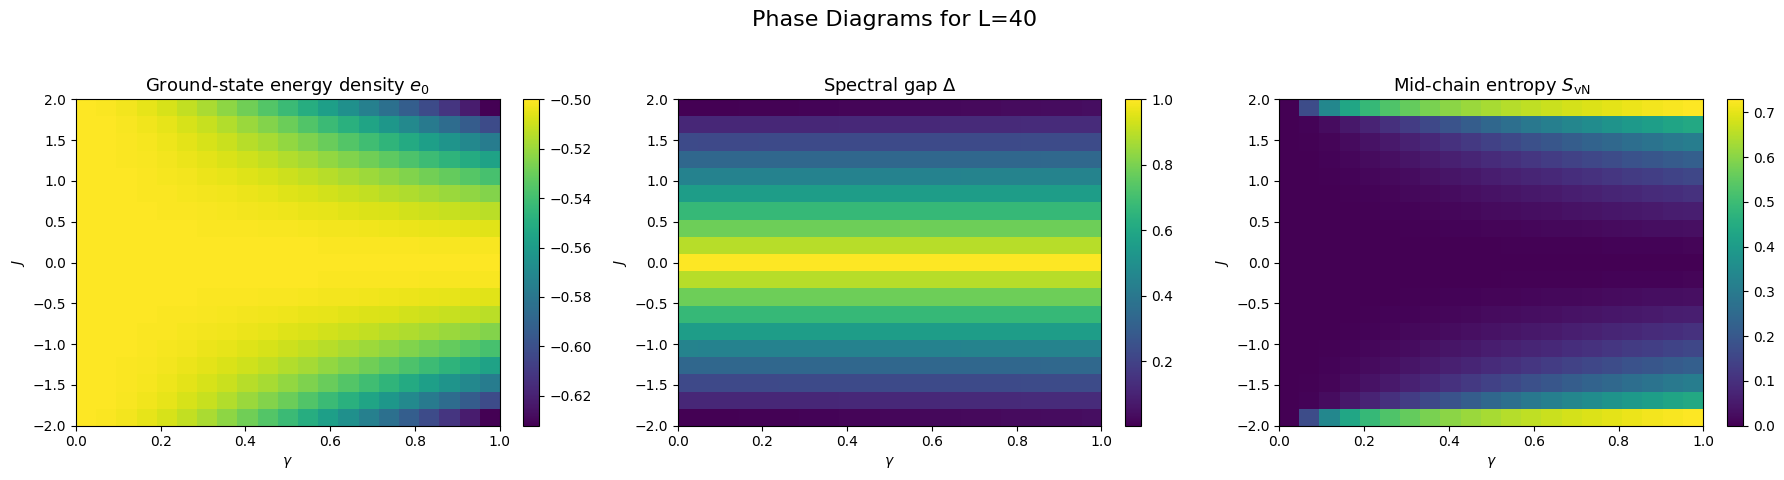

Processing data\XY_phase_diag_L5_chi32.pkl...
Saved phase diagram: plots\XY_phase_diag_L5_chi32_L5_phase_diagrams.png


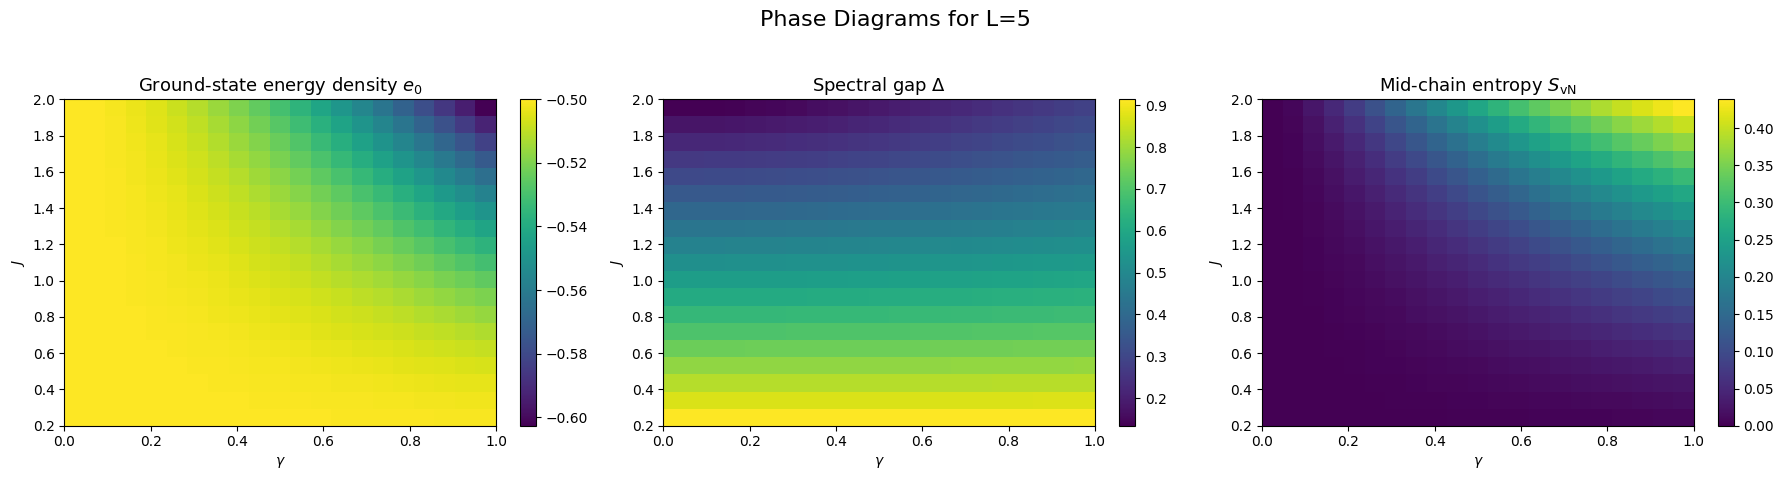

Extracted SvN=0.4386 for L=5 (Closest J=2.00, Gamma=1.00)
Saved entropy vs L plot: plots\overall_entropy_vs_L_J2.00_gamma1.00.png


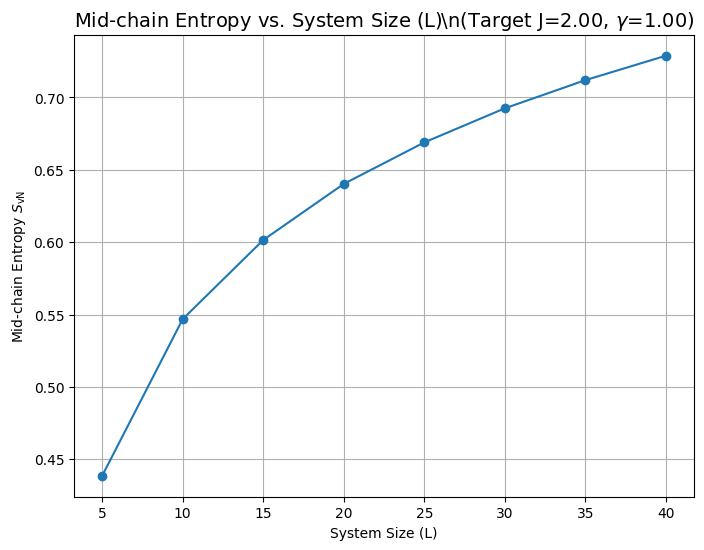

Finished processing. Plots are saved in: plots


In [ ]:
# Main 
data_dir = "data"  # Relative to the notebook's location
output_plot_dir = "plots" # Subdirectory for plots
os.makedirs(output_plot_dir, exist_ok=True)

extracted_entropies_for_L_plot = {} # Key: L, Value: entropy at target_J, target_gamma

# Specify the J and gamma values for the L-dependency plot
target_J_for_L_plot = 2.0 
target_gamma_for_L_plot = 1.0

pickle_files = [f for f in os.listdir(data_dir) if f.endswith(".pkl")]

if not pickle_files:
    print(f"No .pkl files found in {data_dir}. Please check the path.")
else:
    print(f"Found {len(pickle_files)} .pkl files in {data_dir}")

for filename in pickle_files:
    filepath = os.path.join(data_dir, filename)
    print(f"Processing {filepath}...")
    try:
        data = load_data(filepath)
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        continue
    
    L = data.get("system_size")
    if L is None:
        print(f"'system_size' key not found in {filename}. Skipping.")
        continue

    base_filename = os.path.splitext(filename)[0]
    plot_phase_diagrams(data, filename_prefix=base_filename, output_dir=output_plot_dir)

    if base_filename.endswith("broad"):
        continue

    Js = data.get("J_vals")
    gammas = data.get("gamma_vals")
    SvN = data.get("SvN")

    if Js is None or gammas is None or SvN is None:
        print(f"Data for J_vals, gamma_vals, or SvN not found in {filename}. Skipping entropy extraction for L-plot.")
        continue
        
    try:
        j_idx = np.argmin(np.abs(np.array(Js) - target_J_for_L_plot))
        gamma_idx = np.argmin(np.abs(np.array(gammas) - target_gamma_for_L_plot))
        
        mid_chain_entropy = SvN[j_idx, gamma_idx]
        
        extracted_entropies_for_L_plot[L] = mid_chain_entropy
        print(f"Extracted SvN={mid_chain_entropy:.4f} for L={L} (Closest J={Js[j_idx]:.2f}, Gamma={gammas[gamma_idx]:.2f})")
    except IndexError as e:
        print(f"Error accessing SvN data for {filename} with J_idx={j_idx}, gamma_idx={gamma_idx}. SvN shape: {SvN.shape if hasattr(SvN, 'shape') else 'N/A'}. Error: {e}")
        continue
    except Exception as e:
        print(f"An unexpected error occurred during entropy extraction for {filename}: {e}")
        continue

if extracted_entropies_for_L_plot:
    plot_entropy_vs_L(extracted_entropies_for_L_plot, 
                        target_J_for_L_plot, 
                        target_gamma_for_L_plot, 
                        output_dir=output_plot_dir, 
                        filename_prefix="overall_")
else:
    print("No entropy data was successfully extracted for the L-dependency plot. Check target J and gamma values and data file contents.")

print(f"Finished processing. Plots are saved in: {output_plot_dir}")